# Pymaceuticals Inc.

# Importing Data and Setup

In [105]:
# importing setup
import pathlib as path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [106]:
# importing the data from csv files
mouse_meta_data = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

# merging data into one df
df_complete_data = pd.merge(mouse_meta_data, study_results, how = "left", on = ["Mouse ID"])
df_complete_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [107]:
# counting the number of mice in the data frame
df_complete_data["Mouse ID"].nunique()

249

In [108]:
#checking to see if any missing data is present
df_complete_data.isnull().mean()

Mouse ID              0.0
Drug Regimen          0.0
Sex                   0.0
Age_months            0.0
Weight (g)            0.0
Timepoint             0.0
Tumor Volume (mm3)    0.0
Metastatic Sites      0.0
dtype: float64

In [109]:
# checking to see if there are any duplicates in the data frome and printing it 
duplicates = df_complete_data.loc[df_complete_data.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
df_complete_data.loc[df_complete_data["Mouse ID"] == "g989"] 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [110]:
# dropping the duplicated mouse form the data frame
duplicate_mouse = "g989"
rows_dropped = df_complete_data[df_complete_data["Mouse ID"] == duplicate_mouse].index

#creating the cleaned df without the duplicated data
df_cleaned_data = df_complete_data.drop(rows_dropped)
df_cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# comparing the number of mice to the starter code to verify the duplicated data is dropped
df_cleaned_data["Mouse ID"].nunique()

248

In [112]:
# displaying the cleaned data
df_cleaned_data.sort_values(by=['Timepoint'], inplace = True)
df_cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1226,n678,Propriva,Male,5,29,0,45.000000,0
1229,n763,Placebo,Female,16,25,0,45.000000,0
341,v923,Capomulin,Female,19,21,0,45.000000,0
338,w150,Capomulin,Male,23,23,0,45.000000,0
...,...,...,...,...,...,...,...,...
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1763,x402,Stelasyn,Male,21,28,45,61.619606,3
59,s508,Ramicane,Male,1,17,45,30.276232,0
360,g316,Capomulin,Female,22,22,45,40.159220,2


In [113]:
# print cleaned data
df_cleaned_data.reset_index(drop = True).head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,n678,Propriva,Male,5,29,0,45.0,0
2,n763,Placebo,Female,16,25,0,45.0,0
3,v923,Capomulin,Female,19,21,0,45.0,0
4,w150,Capomulin,Male,23,23,0,45.0,0


# Summary Statistics

In [114]:
# Creating variables to hold stats
mean_tumor_vol = df_cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
med_tumor_vol = df_cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_vol_var = df_cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_vol_stdv = df_cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_vol_sterr = df_cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [115]:
# Creating dict to hold variable for df
summary_statistics = {
                    "Mean Tumor Volume": mean_tumor_vol,
                    "Median Tumor Volume": med_tumor_vol,
                    "Tumor Volume Variance": tumor_vol_var,
                    "Tumor Volume Std. Dev": tumor_vol_stdv,
                    "Tumor Volume Std. Err": tumor_vol_sterr
                     } 
# creating the df
df_summary_statistics = pd.DataFrame(summary_statistics)

# calling the df
df_summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts 

In [116]:
# Generate variable to get total number of observed times points per regimen
num_observed_timepoints = df_cleaned_data.groupby(["Drug Regimen"])["Timepoint"].count()
num_observed_timepoints = num_observed_timepoints.sort_values(ascending = False)

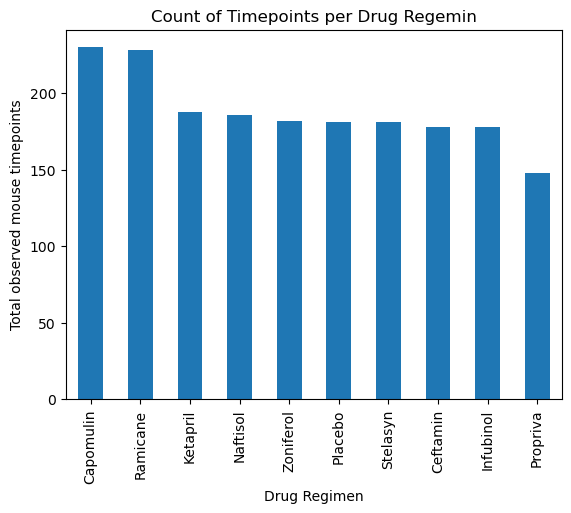

In [117]:
# bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas
num_observed_timepoints.plot.bar()
plt.ylabel("Total observed mouse timepoints")
plt.title("Count of Timepoints per Drug Regemin")
plt.show()

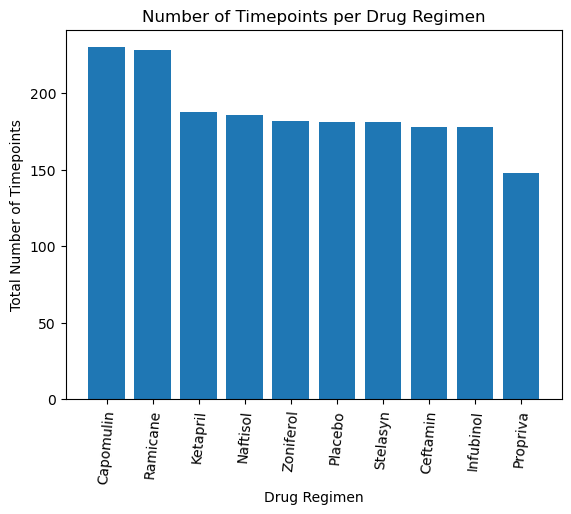

In [118]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt_labels = num_observed_timepoints.index
plt_values = num_observed_timepoints.values

plt.bar(plt_labels, plt_values)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.xticks(rotation = 85)
plt.title('Number of Timepoints per Drug Regimen')
plt.show()

In [119]:
# generate a variable to hold count of mice sex
count_gender = df_cleaned_data["Sex"].value_counts()
count_gender

Sex
Male      958
Female    922
Name: count, dtype: int64

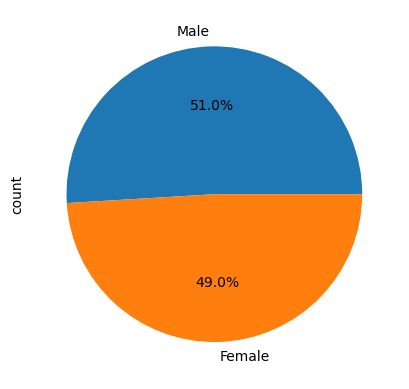

In [120]:
# generating a pie chart showing distribution of gender 
count_gender.plot.pie(autopct='%1.1f%%')
plt.show()


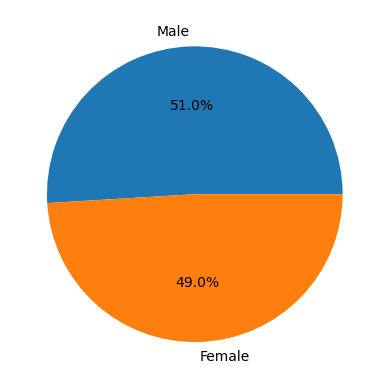

In [121]:
# creating a pie plot showing the distribution of female versus male mice using pyplot
plt_labels2 = count_gender.index
plt_values2 = count_gender.values

plt.pie(count_gender, labels = plt_labels2, autopct='%1.1f%%')
plt.show()

# Calculate Quartiles, Find Outliers, and Create Box Plot

In [122]:
# generating a df that has the last timepoint for each mouse ID
last_timepoint = df_cleaned_data.groupby(["Mouse ID"])["Timepoint"].last()
df_last_timepoint = pd.DataFrame(last_timepoint)

In [123]:
#calling new df
df_last_timepoint

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [124]:
# combining max time point df into clened df and cleaning up column names
df_combined_time_cleaned = pd.merge(df_cleaned_data, df_last_timepoint, how = "left", on = "Mouse ID")

In [125]:
# renaming columns to match data 
df_combined_time_cleaned.rename(columns={"Timepoint_x":"Timepoint", "Timepoint_y":"Max Timepoint"}, inplace = True)

df_combined_time_cleaned.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.0,0,45
1,n678,Propriva,Male,5,29,0,45.0,0,10
2,n763,Placebo,Female,16,25,0,45.0,0,40
3,v923,Capomulin,Female,19,21,0,45.0,0,45
4,w150,Capomulin,Male,23,23,0,45.0,0,10


In [126]:
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

list_final_tumor_volumes = []

for x in treatment_list:
    
    # locate the rows 
    drug_data = df_combined_time_cleaned[df_combined_time_cleaned['Drug Regimen'] == x]

    #creating a variable to find max tumor volume based of final timepoint
    tumor_at_max_timepoints = drug_data.groupby('Mouse ID')['Timepoint'].idxmax()

    # finding max tumor volume
    final_tumor_volume = drug_data.loc[tumor_at_max_timepoints, 'Tumor Volume (mm3)']
    list_final_tumor_volumes.append(final_tumor_volume)

    # IQR creation
    Q1 = final_tumor_volume.quantile(0.25)
    Q3 = final_tumor_volume.quantile(0.75)
    IQR = Q3 - Q1

    # outlier bounds creation
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # variable to hold outliers
    outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]

    # Print the results from the for loop
    print(f" Treatment group '{drug}':")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Outliers: {outliers.values}")

 Treatment group 'Ceftamin':
  Q1: 32.37735684
  Q3: 40.1592203
  IQR: 7.781863460000004
  Outliers: []
 Treatment group 'Ceftamin':
  Q1: 31.56046955
  Q3: 40.65900627
  IQR: 9.098536719999998
  Outliers: []
 Treatment group 'Ceftamin':
  Q1: 54.04860769
  Q3: 65.52574285
  IQR: 11.477135160000003
  Outliers: [36.3213458]
 Treatment group 'Ceftamin':
  Q1: 48.72207785
  Q3: 64.29983003
  IQR: 15.577752179999997
  Outliers: []


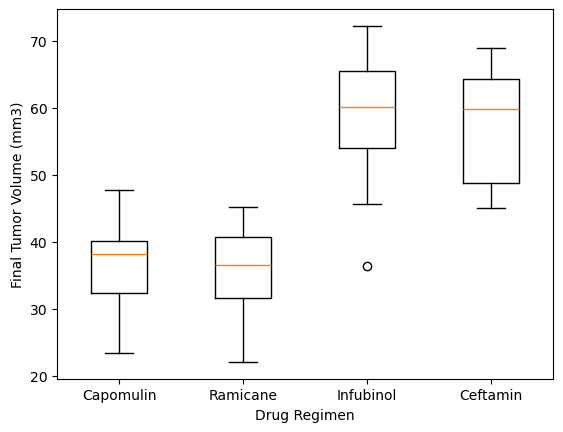

In [127]:
# generating box plots with values generated from for loop list creation
box_plot, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(list_final_tumor_volumes, labels = treatment_list, notch=False)

# printing the box plot
plt.show()

# Generate Line Plot and Scatter plot for Capomulin Regimen

In [133]:
# find all mice that take capomulin
capomulin_mouse = df_cleaned_data.loc[df_cleaned_data["Drug Regimen"] == "Capomulin"] 

In [134]:
# display df to choose a mouse, s185
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
341,v923,Capomulin,Female,19,21,0,45.000000,0
338,w150,Capomulin,Male,23,23,0,45.000000,0
328,j119,Capomulin,Female,7,23,0,45.000000,0
310,j246,Capomulin,Female,21,21,0,45.000000,0
300,b128,Capomulin,Female,9,22,0,45.000000,0
...,...,...,...,...,...,...,...,...
337,j119,Capomulin,Female,7,23,45,38.125164,1
350,v923,Capomulin,Female,19,21,45,40.658124,2
370,s710,Capomulin,Female,1,23,45,40.728578,1
380,l509,Capomulin,Male,17,21,45,41.483008,3


In [137]:
# isolate the mouse into a the df
capomulin_mouse = df_cleaned_data.loc[df_cleaned_data["Mouse ID"] == "s185"] 

capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


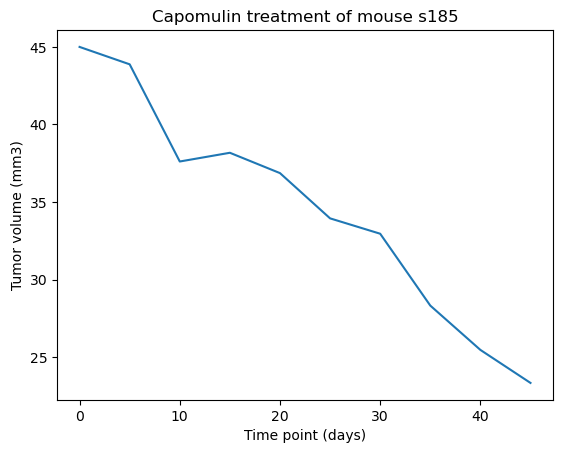

In [142]:
# generating the line plot

# first estabilsh x and y variables
x_values = capomulin_mouse["Timepoint"]
y_values = capomulin_mouse["Tumor Volume (mm3)"]

# now throw the variables into the plot
plt.plot(x_values, y_values)
plt.xlabel("Time point (days)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Capomulin treatment of mouse s185")
plt.show()

In [143]:
# scatter olot creation for average tumor volume and mouse weight

#creating a data frame for pulling variables
capomulin_mice = df_cleaned_data.loc[df_cleaned_data["Drug Regimen"] == "Capomulin"] 

In [160]:
# create the variables to hold the data to later print for scatter plot
avg_tumor_volume = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()

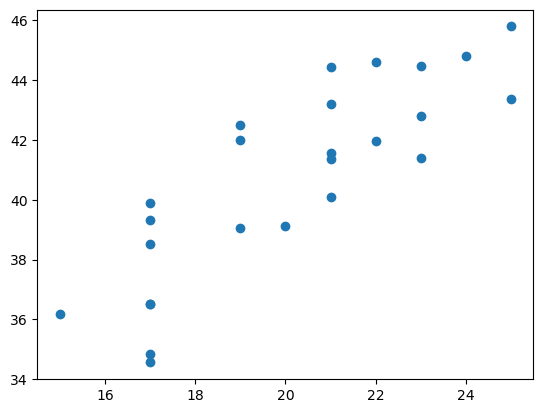

In [161]:
# scatter plot creation
plt.scatter(mouse_weights, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt